# Statistical Distributions

- def: math functions implemented with python code in the `scipy` library that we can use to model real-world processes

In [6]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Uniform Distribution

- discrete `randint`
- continous `uniform`

In [9]:
die_distribution = stats.randint(1, 7)
die_distribution

## Working with Distributions

- `.rvs`: random values, e.g. for simulation
- `.pmf` + `.pdf`: =
- `.cdf` + `.ppf`: <=
- `.sf` + `.isf`: >

In [20]:
die_distribution.rvs((5, 2))

array([[6, 3],
       [5, 6],
       [1, 5],
       [3, 1],
       [5, 6]])

In [21]:
# what is the likelihook we roll a 4?
die_distribution.pmf(4)

0.16666666666666666

In [22]:
# what is the probability that we roll a 3 or less?
die_distribution.cdf(3)

0.5

In [23]:
# what is the likelihood we roll greater than 2?
die_distribution.sf(2)

0.6666666666666667

In [24]:
# there's a 1/6 chance I roll greater than what number?
p = 1/6

die_distribution.isf(p)

5.0

In [27]:
# there's a 50% chance I roll what number or less?
halfway_value = die_distribution.ppf(.5)
halfway_value

3.0

### Mini Exercise

using `scipy.stats.randint`

- what is the likelihood of rolling a 1?
- what is the likelihood of rolling greater than a 4?
- 50% of values will be greater than what number?

In [29]:
(np.random.randint(1, 7, 1000) == 1).mean()

0.152

In [30]:
die_distribution.pmf(1)

0.16666666666666666

In [31]:
die_distribution.sf(4)

0.33333333333333337

In [32]:
die_distribution.isf(.5)

3.0

## Normal Distribution

- continuous random var
- mean, $\mu$, the center
- standard deviation, $\sigma$, the "spread"

In [35]:
coffee_consumption = stats.norm(10, 1)
coffee_consumption

(array([2.000e+00, 4.000e+00, 1.000e+01, 2.700e+01, 5.100e+01, 7.600e+01,
        1.380e+02, 2.450e+02, 3.650e+02, 5.060e+02, 6.530e+02, 8.240e+02,
        9.650e+02, 1.016e+03, 1.083e+03, 9.590e+02, 9.120e+02, 6.780e+02,
        5.050e+02, 3.950e+02, 2.370e+02, 1.530e+02, 1.070e+02, 4.800e+01,
        2.200e+01, 1.000e+01, 3.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([ 6.30612835,  6.56859178,  6.83105521,  7.09351864,  7.35598206,
         7.61844549,  7.88090892,  8.14337234,  8.40583577,  8.6682992 ,
         8.93076262,  9.19322605,  9.45568948,  9.7181529 ,  9.98061633,
        10.24307976, 10.50554319, 10.76800661, 11.03047004, 11.29293347,
        11.55539689, 11.81786032, 12.08032375, 12.34278717, 12.6052506 ,
        12.86771403, 13.13017745, 13.39264088, 13.65510431, 13.91756774,
        14.18003116]),
 <a list of 30 Patch objects>)

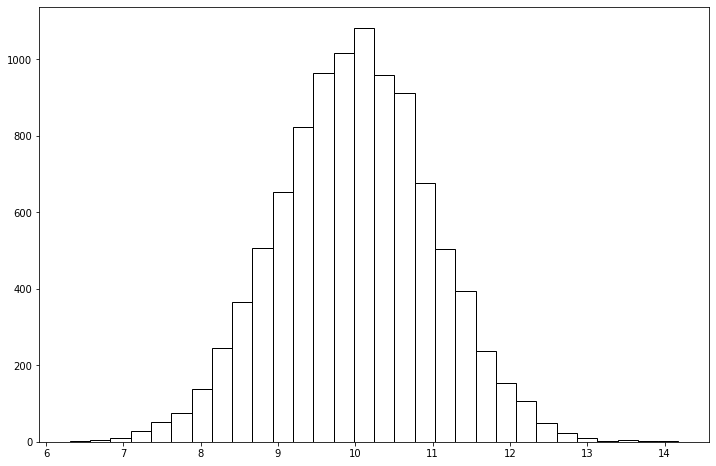

In [41]:
plt.figure(figsize=(12, 8))
plt.hist(coffee_consumption.rvs(10_000), bins=30, fc='white', ec='black')

In [43]:
# what's the likelihood we consume less (or equal to) than 8.5 liters of coffee one day?
coffee_consumption.cdf(8.5)

0.06680720126885807

In [44]:
# how little coffee would we have to drink to be in the bottom quarter of all days of coffee consumption?
coffee_consumption.ppf(.25)

9.325510249803918

Say the average internet consumption for Spectrum for a neighborhood is 1250 GB +- 100 GB. This is the historical average for the last 3 months.

On monday we observed 1500 GB of consumption. Assuming internet usage patterns haven't changed, how likely is it we'd see this number due to chance?

In [50]:
mean = 1250
sd = 100

stats.norm(mean, sd).sf(1500)
# is the same as
internet_usage = stats.norm(1250, 100)
internet_usage.sf(1500)

0.006209665325776132

In [51]:
# how much consumption contitues the top 0.006209665325776132 of all days?
internet_usage.isf(0.006209665325776132)

1500.0

In [52]:
value = 1500

internet_usage.isf(internet_usage.sf(value)) == value

True

In [53]:
# How much data usage constitutes the top 10% of all days?
internet_usage.isf(.1)

1378.15515655446

In [54]:
internet_usage.ppf(.9)

1378.15515655446

(array([4.000e+00, 6.000e+00, 1.600e+01, 3.900e+01, 9.200e+01, 1.710e+02,
        3.210e+02, 6.740e+02, 1.152e+03, 1.881e+03, 2.984e+03, 4.267e+03,
        5.795e+03, 7.221e+03, 8.520e+03, 9.532e+03, 1.012e+04, 9.868e+03,
        9.111e+03, 7.945e+03, 6.414e+03, 4.824e+03, 3.464e+03, 2.347e+03,
        1.445e+03, 8.620e+02, 4.500e+02, 2.420e+02, 1.280e+02, 6.200e+01,
        2.900e+01, 1.100e+01, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 824.21299004,  849.64142475,  875.06985947,  900.49829419,
         925.92672891,  951.35516362,  976.78359834, 1002.21203306,
        1027.64046778, 1053.06890249, 1078.49733721, 1103.92577193,
        1129.35420665, 1154.78264136, 1180.21107608, 1205.6395108 ,
        1231.06794552, 1256.49638023, 1281.92481495, 1307.35324967,
        1332.78168439, 1358.2101191 , 1383.63855382, 1409.06698854,
        1434.49542326, 1459.92385797, 1485.35229269, 1510.78072741,
        1536.20916213, 1561.63759684, 1587.06603156, 1612.49446628,
        1637.92290099

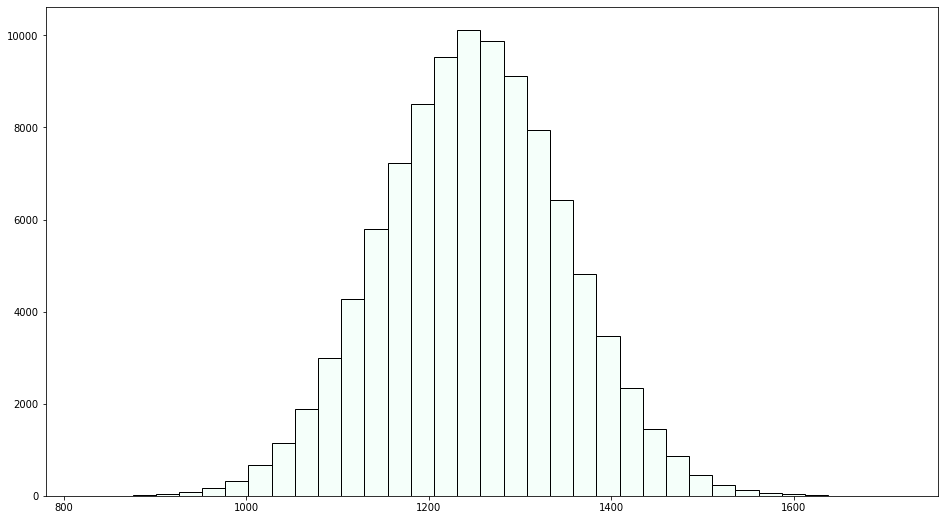

In [56]:
plt.figure(figsize=(16, 9))
plt.hist(internet_usage.rvs(100_000), bins=35, ec='black', fc='mintcream')

## Binomial Distribution

- discrete random var: number of "successes"
- $n$, number of trials
    - outcome of one trial is binary, yes or no
- $p$, probability of success for one trial

In [64]:
# there's a 70 percent chance a food truck shows up.
# What's the likelihood a food truck shows up 2 days out of the week?

# outcome: # of days that a food truck shows up
# n == 5
# p == .70

n = 5
p = .3

stats.binom(n, p).pmf(2)

0.3086999999999999

Text(0, 0.5, 'probability of this outcome')

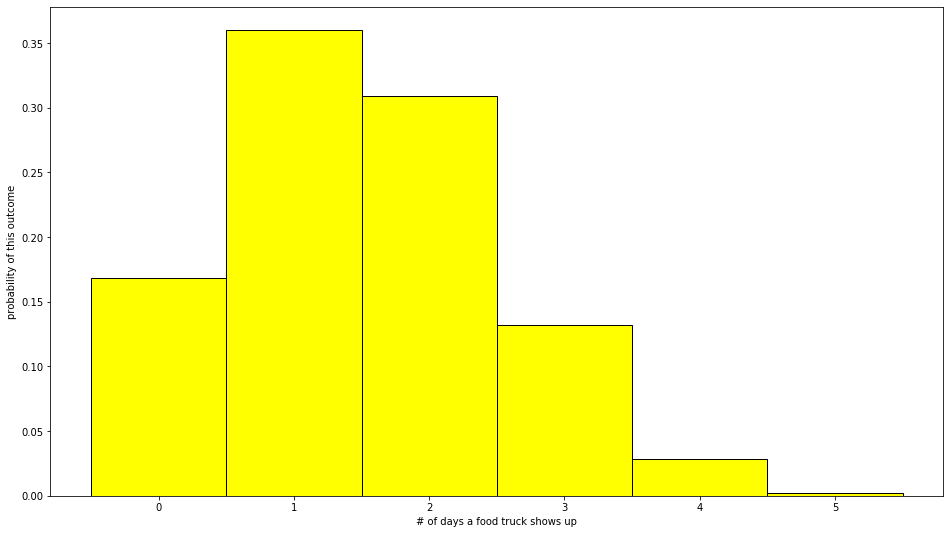

In [65]:
plt.figure(figsize=(16, 9))
x = np.arange(0, 6)
y = stats.binom(n, p).pmf(x)

plt.bar(x, y, width=1, ec='black', fc='yellow')
plt.xlabel('# of days a food truck shows up')
plt.ylabel('probability of this outcome')

In [66]:
# What's the likelihood that a food truck shows up 3 or less days out of the week?

n = 5
p = .7

stats.binom(n, p).cdf(3)

0.47178000000000003

In [67]:
# what's the likehood that a food truck shows up less than 3 days out of the week?
# rephrase in order to use our functions
# likelihood a food truck shows up 2 or less days out of the week
stats.binom(n, p).cdf(2)

0.16308000000000006

In [69]:
# P(less than 3 days) is equal to
# P(3 or less days) - P(3)
stats.binom(n, p).cdf(3) - stats.binom(n, p).pmf(3)

0.1630800000000001

---

Say you go to the grocery store, and there's a 80% chance they have toilet paper. If everyone in Curie goes to the store, how likely is it we all can buy toilet paper?

In [74]:
n = 17
p = .8

stats.binom(n, p).pmf(n) # likelihood that all trials are successes

0.0225179981368525

Suppose there's a surprise stats quiz this afternoon, and you haven't studied. There's 10 multiple chioce questions, each with 4 answers. If you guess at random for each question, what's the likelihood that you pass the quiz?

In [75]:
p = .25
n = 10

stats.binom(n, p).sf(6) # 7 or more

0.003505706787109374

## Poisson Distribution

- discrete random var: number of events
- $\lambda$: avg rate over time

Suppose codeup students ask, on average, 3.5 questions per lecture. What is the likelihood that more than 4 questions are asked during the statistical distributions lesson?

In [76]:
stats.poisson(3.5).sf(4)

0.2745550466903957

Text(0.5, 0, 'number of questions')

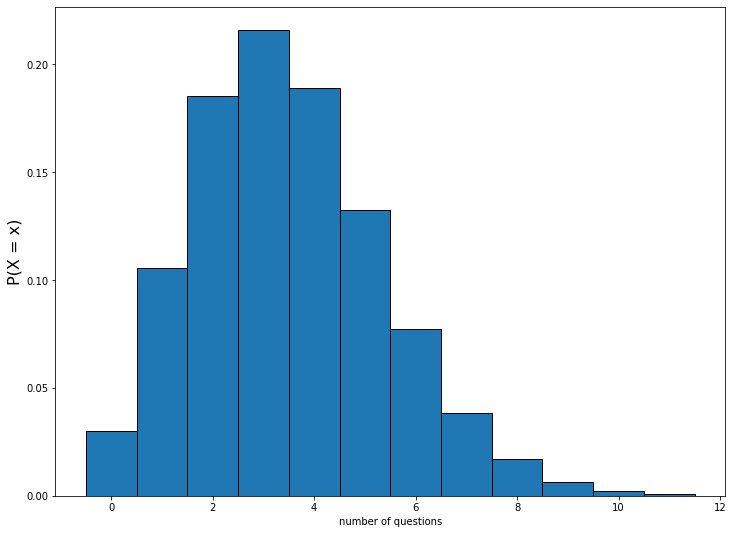

In [81]:
plt.figure(figsize=(12, 9))
x = np.arange(0, 12)
y = stats.poisson(3.5).pmf(x)

plt.bar(x, y, ec='black', width=1)
plt.ylabel('P(X = x)', size=16)
plt.xlabel('number of questions')

In [82]:
# what is the likelihood that 2 or fewer questions are asked?
stats.poisson(3.5).cdf(2)

0.32084719886213414

In [85]:
# For modeling food trucks we used a binomial distribution
# Given P(food truck shows up one day), number of days

# for a poisson distribution, we need an average rate over time
# given number of food trucks per week
# on average 3 food trucks show up per week.

# for a given week, what's the likelihood that a food truck shows up every day -- p(5 or more food trucks show up)
stats.poisson(3).sf(4)

0.18473675547622787

Text(0.5, 0.98, "Binomial vs Poisson Distributions -- Be careful! We're asking 2 different questions!")

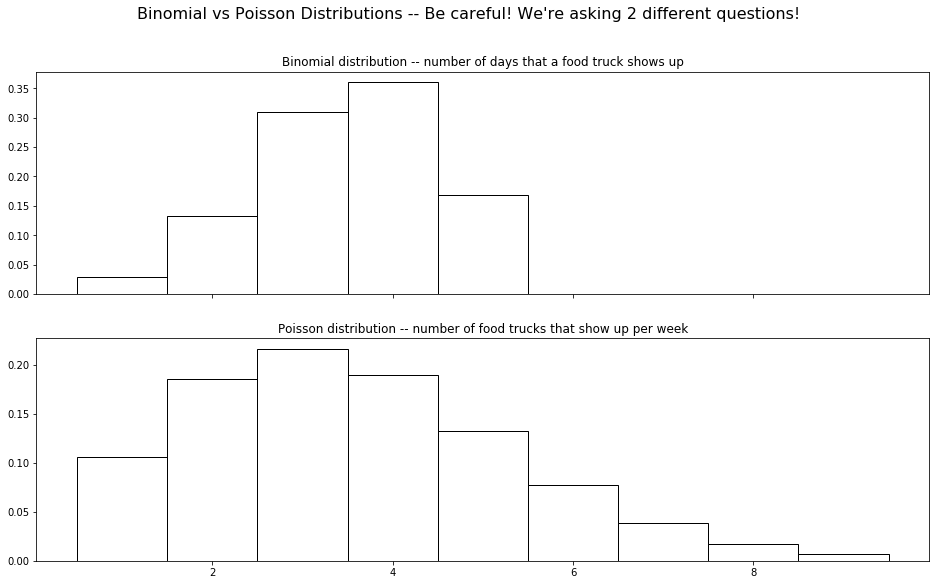

In [93]:
n = 5
p = .7

x = np.arange(1, 10)
y1 = stats.binom(n, p).pmf(x)
y2 = stats.poisson(n * p).pmf(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

ax1.bar(x, y1, width=1, ec='black', fc='white')
ax1.set(title='Binomial distribution -- number of days that a food truck shows up')

ax2.bar(x, y2, width=1, ec='black', fc='white')
ax2.set(title='Poisson distribution -- number of food trucks that show up per week')

fig.suptitle('Binomial vs Poisson Distributions -- Be careful! We\'re asking 2 different questions!', size=16)

I have some X, and we're only looking at whole numbers,

X > 3

is the same thing as

X >= 4

---

X < 10

is the same as

X <= 9

Differences between poisson and binomial distribution:

- poisson is defined by an average rate over time
- poisson has no upper bound on number of events
- binomial is defined by a chance of success and a number of trials
- binomial has a fixed upper bound, the number of trials